In [4]:
import pandas as pd 
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import download

In [5]:
# download('stopwords')
stop_words = stopwords.words('english')

In [6]:
df = pd.read_csv('../data/train.csv')

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df = df.dropna()

In [9]:
df.count()

id              404287
qid1            404287
qid2            404287
question1       404287
question2       404287
is_duplicate    404287
dtype: int64

In [10]:
model = KeyedVectors.load_word2vec_format('../../pretrained_models/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [11]:
def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

def wmd(row):
    q1 = preprocess(row['question1'])
    q2 = preprocess(row['question2'])
    return model.wmdistance(q1, q2)

In [12]:
df['wmd'] = df.apply(wmd, axis=1)

In [13]:
inf_df = df[(df == np.inf).any(axis=1)]
non_inf_df = df[~df.isin([np.inf, -np.inf]).any(1)]

In [14]:
non_inf_df['wmd'].describe()

count    393327.000000
mean          2.008018
std           1.087942
min           0.000000
25%           1.274682
50%           2.025405
75%           2.801772
max           6.943244
Name: wmd, dtype: float64

In [15]:
duplicates_df = non_inf_df[non_inf_df['is_duplicate']==1]
non__duplicates_df = non_inf_df[non_inf_df['is_duplicate']==0]

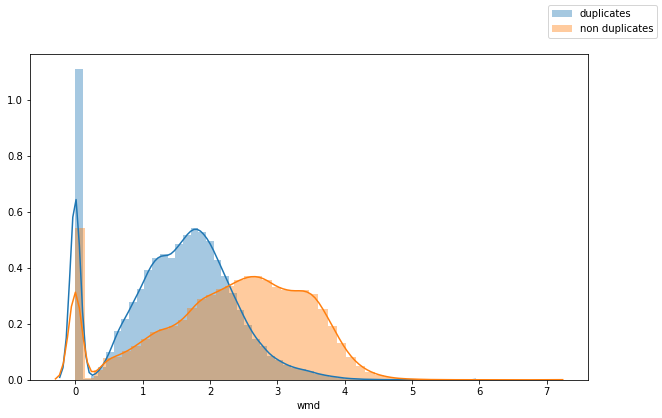

In [16]:
fig = plt.figure(figsize=(10,6))

sns.distplot(duplicates_df['wmd'])
sns.distplot(non__duplicates_df['wmd'])
fig.legend(labels=['duplicates','non duplicates']);

In [17]:
non__duplicates_df['wmd'].describe()

count    246547.000000
mean          2.307973
std           1.107585
min           0.000000
25%           1.619374
50%           2.446790
75%           3.155591
max           6.943244
Name: wmd, dtype: float64

In [18]:
duplicates_df['wmd'].describe()

count    146780.000000
mean          1.504182
std           0.840361
min           0.000000
25%           1.002534
50%           1.580328
75%           2.058633
max           5.708485
Name: wmd, dtype: float64

In [19]:
non__duplicates_df[non__duplicates_df['wmd']==0]

,id,qid1,qid2,question1,question2,is_duplicate,wmd
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,0.0
14,14,29,30,What are the laws to change your status from a...,What are the laws to change your status from a...,0,0.0
41,41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,0.0
42,42,85,86,"Can I make 50,000 a month by day trading?","Can I make 30,000 a month by day trading?",0,0.0
89,89,179,180,What is your review of The Next Warrior: Provi...,What is your review of The Next Warrior: Provi...,0,0.0
...,...,...,...,...,...,...,...
404194,404194,6470,167204,How do the tourist attractions on the Scandina...,How do the tourist attractions on the Scandina...,0,0.0
404207,404207,537857,410771,Is it safe to drink tap water in Canada?,Is it safe to drink tap water in Pune?,0,0.0
404252,404252,537898,148779,What is the best free web hosting for php?,What are the best free web hosting services?,0,0.0
404270,404270,537912,35364,What is the difference between who and how?,"What is the difference between ""&"" and ""and""?",0,0.0


In [20]:
inf_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,wmd
40,40,81,82,Why do Slavs squat?,Will squats make my legs thicker?,0,inf
56,56,113,114,Who is israil friend?,Is my boyfriend lying about his true feelings ...,0,inf
97,97,195,196,Why did harry become a horcrux?,What is a Horcrux?,0,inf
106,106,213,214,Have you ever heard of travel hacking?,Can WhatsApp be hacked?,0,inf
115,115,231,232,Why do we cry when we are happy and when we ar...,Why do we cry?,0,inf
